In [1]:
import numpy as np
from numpy import load, arange, linspace
import matplotlib.pyplot as plt
from utils import box_plot

In [3]:
folder = "experiment21/"
THETA_ESS_THUG = load(folder + "THETA_ESS_THUG.npy")
U_ESS_THUG     = load(folder + "U_ESS_THUG.npy")
ESS_THUG       = load(folder + "ESS_THUG.npy")
A_THUG         = load(folder + "A_THUG.npy")
RMSE_THUG      = load(folder + "RMSE_THUG.npy")
EJSD_THUG      = load(folder + "EJSD_THUG.npy")
G_EJSD_THUG    = load(folder + "G_EJSD_THUG.npy")
T_EJSD_THUG    = load(folder + "T_EJSD_THUG.npy")
A_HOP_THUG     = load(folder + "A_HOP_THUG.npy")
N_UNIQUE_THUG  = load(folder + "N_UNIQUE_THUG.npy")


THETA_ESS_THUG_AR = load(folder + "THETA_ESS_THUG_AR.npy")
U_ESS_THUG_AR     = load(folder + "U_ESS_THUG_AR.npy")
ESS_THUG_AR       = load(folder + "ESS_THUG_AR.npy")
A_THUG_AR         = load(folder + "A_THUG_AR.npy")
RMSE_THUG_AR      = load(folder + "RMSE_THUG_AR.npy")
EJSD_THUG_AR      = load(folder + "EJSD_THUG_AR.npy")
G_EJSD_THUG_AR    = load(folder + "G_EJSD_THUG_AR.npy")
T_EJSD_THUG_AR    = load(folder + "T_EJSD_THUG_AR.npy")
A_HOP_THUG_AR     = load(folder + "A_HOP_THUG_AR.npy")
N_UNIQUE_THUG_AR  = load(folder + "N_UNIQUE_THUG_AR.npy")


RHOS    = load(folder + "RHOS.npy")
EPSILONS = load(folder + "EPSILONS.npy")

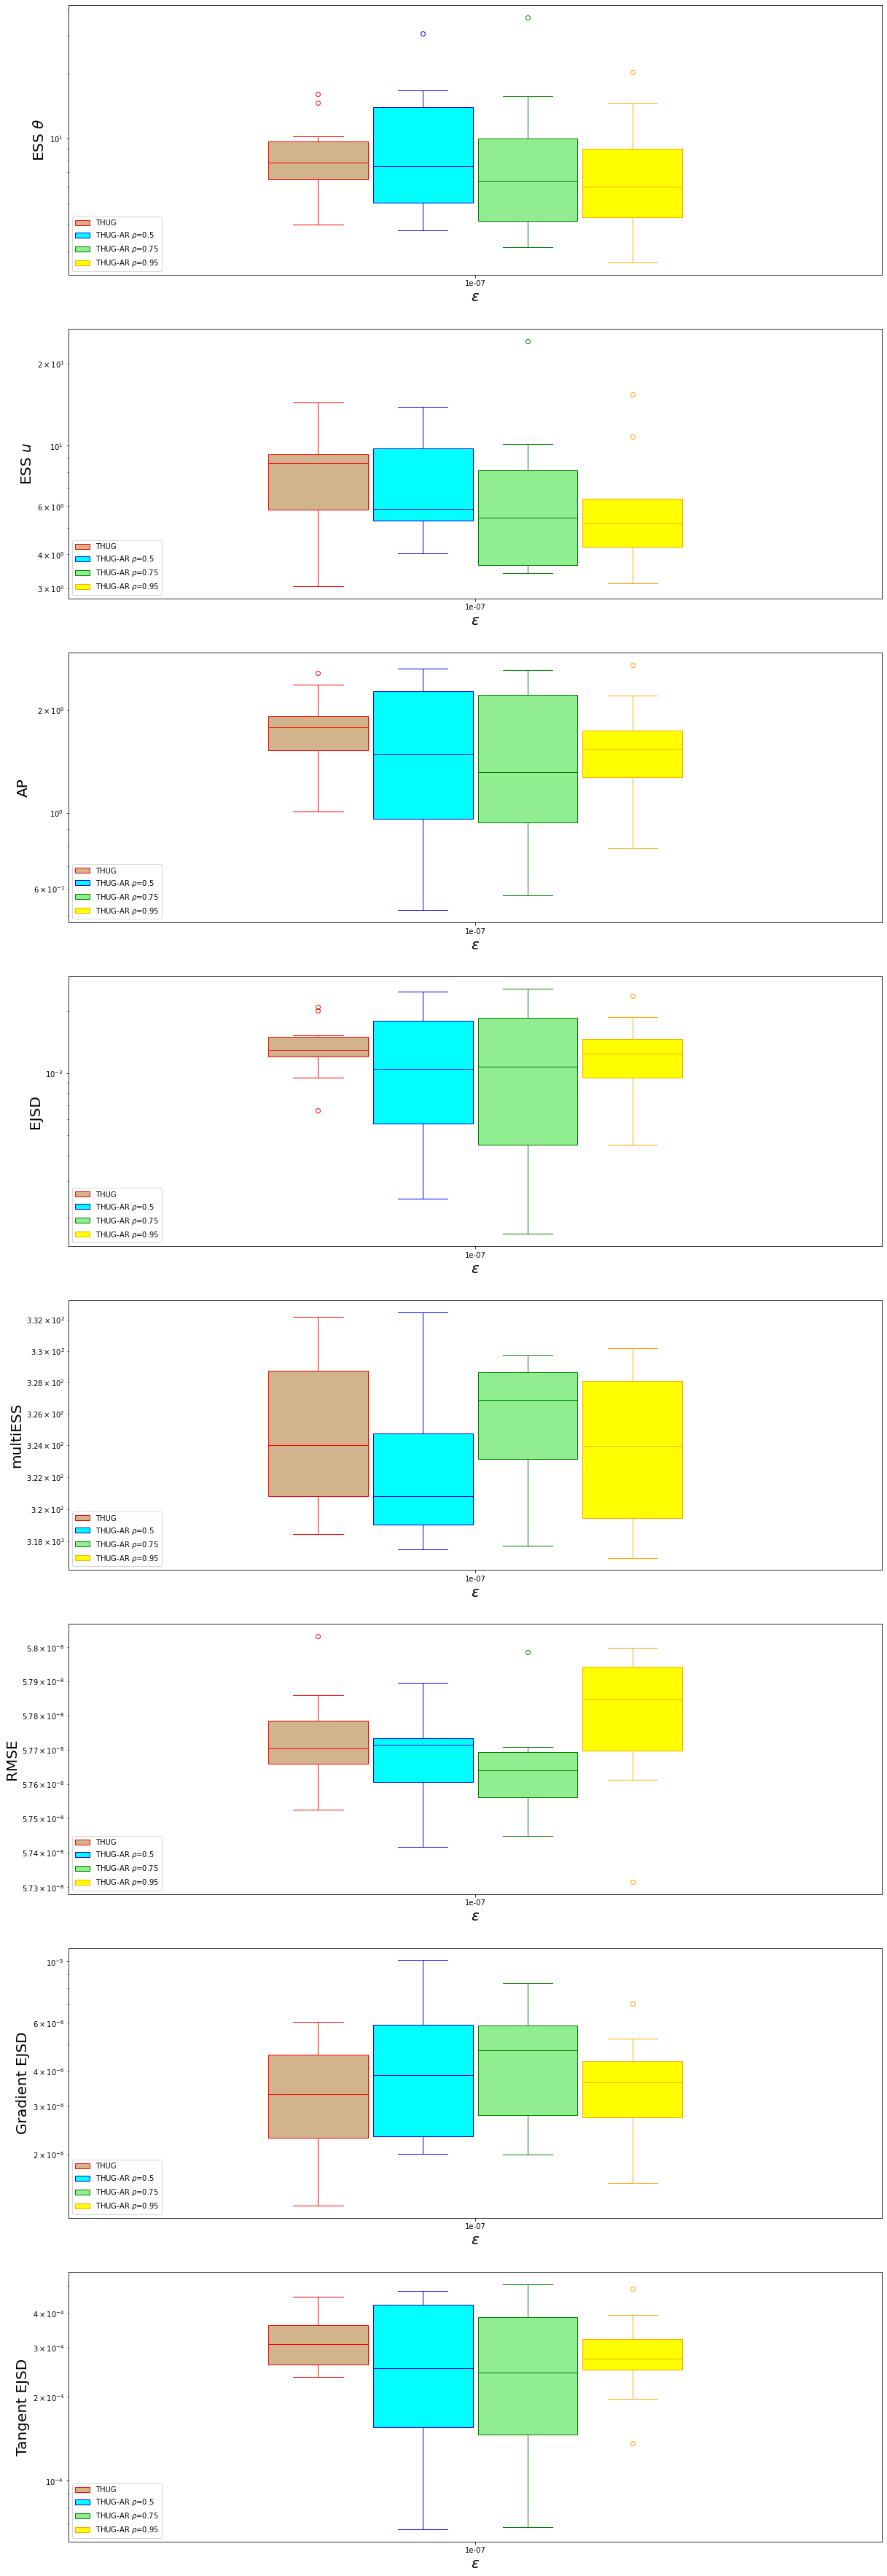

In [5]:
columns = EPSILONS
width = 0.21
thing_that_changes = RHOS
n_alphas = len(thing_that_changes)
ticks = arange(start=1, stop=len(columns)*2, step=2)
n_boxes = n_alphas + 1
disp = linspace(-width * (n_boxes-1) / 2, width * (n_boxes-1) / 2, n_boxes, endpoint=True)
positions = disp.reshape(-1, 1) + ticks
colors1 = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'black']
colors2 = ['tan', 'cyan', 'lightgreen', 'yellow', 'violet', 'orange', 'lightgray']
labels = ['THUG'] + ['THUG-AR $\\rho$={}'.format(thing) for thing in thing_that_changes]

ARRAYS = [
    (THETA_ESS_THUG, THETA_ESS_THUG_AR),
    (U_ESS_THUG, U_ESS_THUG_AR),
    (A_THUG, A_THUG_AR),
    (EJSD_THUG, EJSD_THUG_AR),
    (ESS_THUG, ESS_THUG_AR),
    (RMSE_THUG, RMSE_THUG_AR),
    (G_EJSD_THUG, G_EJSD_THUG_AR),
    (T_EJSD_THUG, T_EJSD_THUG_AR)
]
YLABELS = [
    'ESS $\\theta$', 
    'ESS $u$',
    'AP',
    'EJSD',
    'multiESS',
    'RMSE',
    'Gradient EJSD',
    'Tangent EJSD'
]
n_plots = len(ARRAYS)
fig, ax = plt.subplots(nrows=n_plots, figsize=(20, 8 * n_plots))
for ix, (array1, array2) in enumerate(ARRAYS):
    bp1 = box_plot(ax[ix], array1.T.tolist(), 'red', 'tan', positions[0])
    bps = []
    for i in range(n_alphas):
        bps.append(box_plot(ax[ix], array2[:,:,i].T.tolist(), colors1[i+1], colors2[i+1], positions[i+1]))
    handles = [bp1["boxes"][0]] + [bp["boxes"][0] for bp in bps]
    ax[ix].legend(
        handles, 
        labels, 
        loc='lower left')
    ax[ix].set_xticks(ticks)
    ax[ix].set_xticklabels(columns)
    ax[ix].set_xlabel("$\\epsilon$", fontsize=20)
    ax[ix].set_ylabel(YLABELS[ix], fontsize=20)
    ax[ix].semilogy()

plt.show()